# Relação entre variável explicativa e de resposta

In [1]:
import sys
import warnings
sys.path.append('..')
import seaborn as sns
from myst_nb import glue
from global_configurations import *
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed
from collections import OrderedDict
from IPython.display import display

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

conf_dict = read_config_file(DATASET_INFO_PATH)
df = read_dataset(conf_dict, DATASET_PATH)

df, numerical, categorical, categorical_dt, datetime, target = infer_column_types(df, conf_dict)

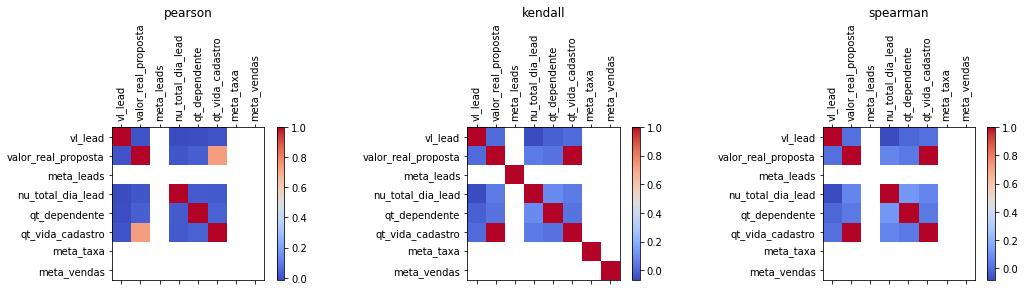

In [2]:
methods = ['pearson', 'kendall', 'spearman']

fig = plt.figure(figsize=(15, 4))
for idx, m in enumerate(methods, 1):
    ax = fig.add_subplot(1, 3, idx)
    correlation_matrix(df[numerical], numerical, m, fig, ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set(title=m)
fig.tight_layout()

glue("numerical_corr_matrix_plot", fig, display=False)

## Numérica
```{glue:} numerical_corr_matrix_plot
```
```{glue:} numerical_relations
```

In [3]:
# TODO: Explicar a relação entre as variáveis com regressão linear
def scatter_plot(data, x, y, target):
    fig, ax = plt.subplots(1)
    cols = [x] if x == y else [x, y]
    data = data[cols + [target]].fillna(0)
    return sns.scatterplot(data=data, x=x, y=y, ax=ax, hue=target)

w1, w2 = None, None

cols_list = numerical
    
w1 = widgets.Dropdown(
    options=cols_list,
    value=cols_list[0],
    description='Variável 1:'
)
w2 = widgets.Dropdown(
    options=cols_list,
    value=cols_list[1],
    description='Variável 2:'
)

i = interactive(scatter_plot, data=fixed(df), x=w1, y=w2, target=fixed(target))
hbox = widgets.HBox(i.children)
display(hbox)

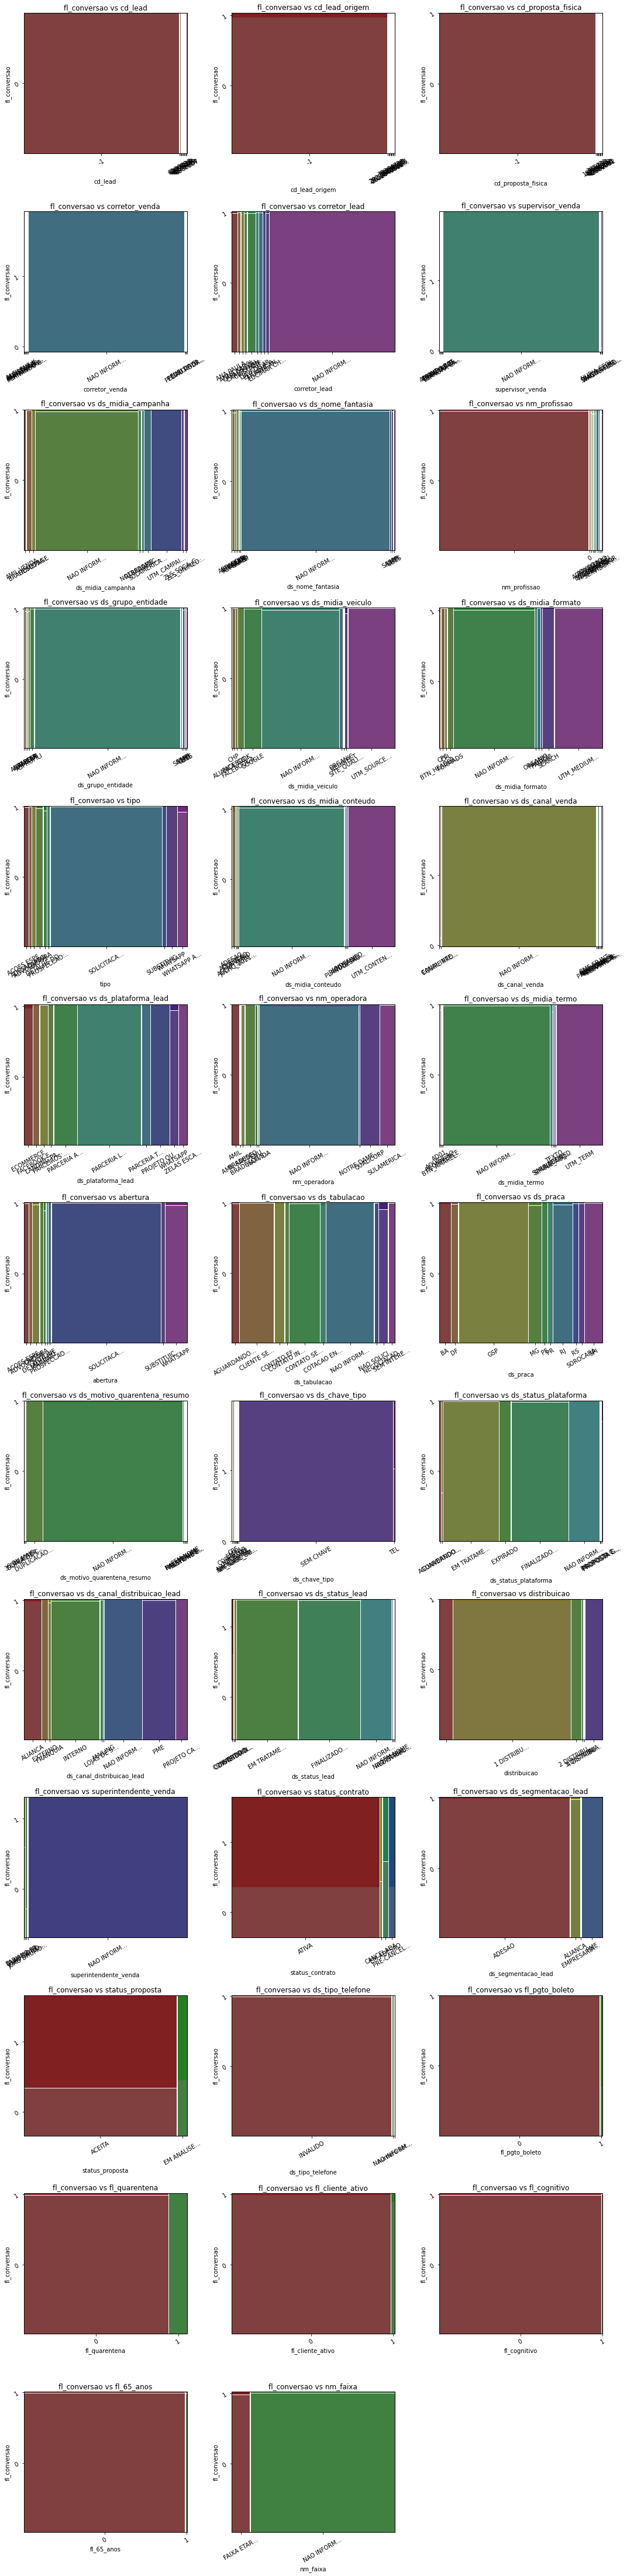

In [4]:
fig = plt.figure(figsize=(15, 65))

def supress_category_label(lbl, size=10):
    if not isinstance(lbl, str):
        return lbl
    if len(lbl) < size:
        return lbl
    return f"{lbl[:size]}..."

for idx, var in enumerate(categorical, 1):
    ax = fig.add_subplot(14, 3, idx)
    data = df[[target, var]] 
    data[var] = data[var].apply(supress_category_label)
   
    mosaic_plot(data=data, x=target, y=var, ax=ax)

fig.tight_layout()

glue("categorical_mosaic_plot", fig, display=False)

## Categórica
```{glue:} categorical_mosaic_plot
```
```{glue:} categorical_relations
```

In [5]:
w1, w2 = None, None

if target:
    cols_list = [target] + categorical 
    cols_list = list(OrderedDict.fromkeys(cols_list)) 
else:
    cols_list = conf_dict['CategoricalColumns']
    
w1 = widgets.Dropdown(
    options=cols_list,
    value=cols_list[0],
    description='Variável 1:'
)
w2 = widgets.Dropdown(
    options=cols_list,
    value=cols_list[1],
    description='Variável 2:'
)

i = interactive(interactive_mosaic_plot, data=fixed(df), x=w1, y=w2)
hbox = widgets.HBox(i.children)
display(hbox)

## Numérica e Categórica

In [ ]:
# TODO: Plotar relação entre variaveis numéricas e categóricas

## Análise de Componentes Principais

In [ ]:
# TODO: Utilizar PCA nas variáveis numéricas